#Important Stuff

In [ ]:
import numpy as np

In [ ]:
def read_report(filename):
  with open(filename) as inf:
    lines = inf.readlines()
    ds=  lines[2].split()
    ss = lines[3].split()
    js = lines[4].split()
    # print(lines[5])

    #Distractor Prec, Distractor Recall, Succession Prec, Succession Rec, Juxtaposition Prec, Juxtaposition Recall
    return float(ds[1]), float(ds[2]), float(ss[1]), float(ss[2]), float(js[1]), float(js[2])

In [ ]:
import glob
import re

## semantic

In [ ]:
all_files = glob.glob("outputs/*.txt")


def get_lists(num, control=False, glove=False, precision=False, s=1):
  if num:
    n = str(num)
  else:
    n="None"


  if not control and not glove:
    file_re = f"outputs/classification_report_layer([1-9]|1[0-2])_base_lt_LR_subtype2_2025_?{n}_seed_{s}.txt"
  elif glove:
    file_re = f"outputs/classification_report_glove_base_lt_LR_subtype2_2025_?{n}_seed_{s}.txt"
  else:
    file_re = f"outputs/classification_report_layer([1-9]|1[0-2])_base_lt_control_LR_subtype2_2025_?{n}_seed_{s}.txt"
  s_100 = []
  j_100 = []
  d_100 = []

  f_list = []
  for f in all_files:
    if re.match(file_re, f) is not None:
      # print(f)
      f_list.append(f)

  f_list.sort()


  print(f_list)
  if not glove:
    assert len(f_list) == 12
  else:
    assert len(f_list) == 1

  f_list_new = f_list[3:] + f_list[:3]

  for f in f_list_new:
    #print(f)
    scores = read_report(f)
    # print(scores)
    if not precision:
      d_100.append(scores[1]) #recalls, change to 0, 4, 2
      j_100.append(scores[5])
      s_100.append(scores[3])
    else:
      d_100.append(scores[0]) #recalls, change to 0, 4, 2
      j_100.append(scores[4])
      s_100.append(scores[2])

  return d_100, s_100, j_100

In [ ]:
def get_average_seeds(num, control=False, glove=False, precision=False):
  d_100s = []
  s_100s = []
  j_100s = []
  for s in range(1, 6):
    d_100, s_100, j_100 = get_lists(num=num, control=control, glove=glove, precision=precision, s=s)
    d_100s.append(d_100)
    s_100s.append(s_100)
    j_100s.append(j_100)

  d_100_avg = np.mean(d_100s, axis=0)
  s_100_avg = np.mean(s_100s, axis=0)
  j_100_avg = np.mean(j_100s, axis=0)

  return list(d_100_avg), list(s_100_avg), list(j_100_avg)

In [ ]:
d_10, s_10, j_10 = get_average_seeds(num=10)
d_25, s_25, j_25 = get_average_seeds(num=25)
d_100, s_100, j_100 = get_average_seeds(num=100)
d_full, s_full, j_full = get_lists(num=None)

d_100_p, s_100_p, j_100_p = get_lists(num=100, precision=True)
d_25_p, s_25_p, j_25_p = get_lists(num=25, precision=True)
d_10_p, s_10_p, j_10_p = get_lists(num=10, precision=True)
d_full_p, s_full_p, j_full_p = get_lists(num=None, precision=True)

d_glove, s_glove, j_glove = get_average_seeds(num=None, glove=True)
d_glove_p, s_glove_p, j_glove_p = get_average_seeds(num=None, glove=True, precision=True)


d_control, s_control, j_control = get_average_seeds(num=None, control=True)
d_control_p, s_control_p, j_control_p = get_average_seeds(num=None, control=True, precision=True)

In [ ]:
import numpy as np
mean_control = list(np.mean([d_control, s_control, j_control], axis=0))

glove = list(np.mean([d_glove, s_glove, j_glove], axis=0))
mean_glove = glove * 12


# better graph

In [ ]:
all_scores = d_25 + d_100 + d_full + s_25 + s_100 + s_full + j_25 + j_100 + j_full + mean_control + mean_glove

In [ ]:
all_scores_p = d_25_p + d_100_p + d_full_p + s_25_p + s_100_p + s_full_p + j_25_p + j_100_p + j_full_p + mean_control + mean_glove

In [ ]:
di_glove = d_glove * 12
ju_glove = j_glove * 12
su_glove = s_glove * 12

di_glove_p = d_glove_p * 12
ju_glove_p = j_glove_p * 12
su_glove_p = s_glove_p * 12

all_scores_recall = d_10 + d_25 + d_100 + d_full + \
 s_10 + s_25 + s_100 + s_full + \
 j_10 + j_25 + j_100 + j_full + \
 d_control + di_glove + \
 s_control + su_glove + \
 j_control + ju_glove

all_scores_precision = d_10_p + d_25_p + d_100_p + d_full_p + \
 s_10_p + s_25_p + s_100_p + s_full_p + \
 j_10_p + j_25_p + j_100_p + j_full_p + \
 d_control_p + di_glove_p + \
 s_control_p + su_glove_p + \
 j_control_p + ju_glove_p


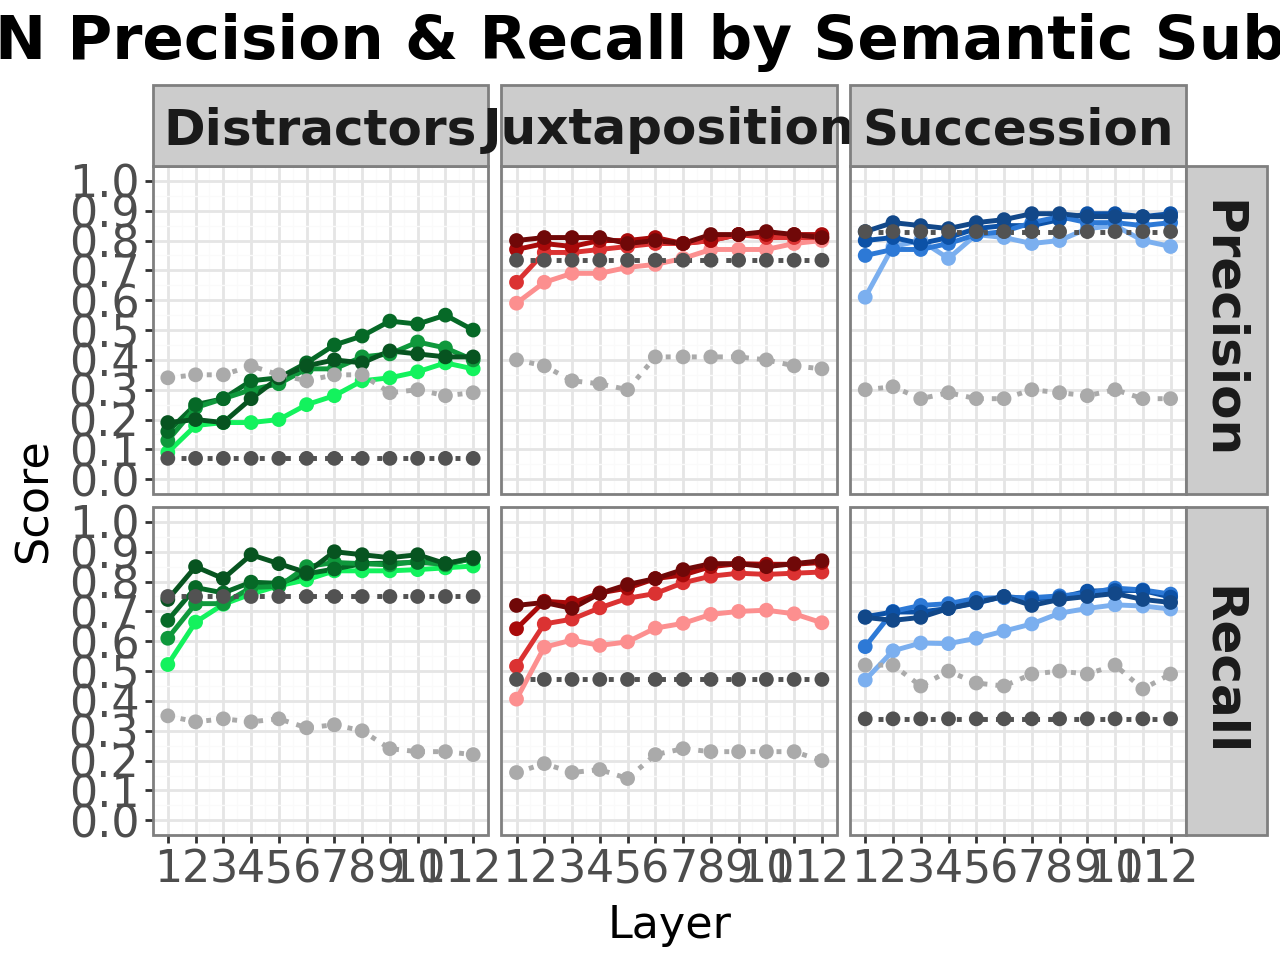

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 15 x 8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: line_chart_dotted8.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (
    theme, element_text, ggplot, aes, geom_line, geom_point, theme_minimal, labs,
    scale_color_manual, scale_x_continuous, scale_y_continuous, facet_grid, scale_linetype_manual
)

# Sample data
data = {
    'Layer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 18,
    'Precision': all_scores_precision,  # Precision scores
    'Recall': all_scores_recall,  # Recall scores
    'Category': ['Distractors (10 Train Examples)']*12 + ['Distractors (25 Train Examples)']*12 + ['Distractors (100 Train Examples)']*12 +
                ['Distractors (All 287 Train Examples)']*12 + ['Succession (10 Train Examples)']*12 +
                ['Succession (25 Train Examples)']*12 +  ['Succession (100 Train Examples)']*12 + ['Succession (All 287 Train Examples)']*12 +
                ['Juxtaposition (10 Train Examples)']*12 + ['Juxtaposition (25 Train Examples)']*12 + ['Juxtaposition (100 Train Examples)']*12 +
                ['Juxtaposition (All 287 Train Examples)']*12 + ['Distractors Control (All Train Examples)']*12 +
                ['Distractors GloVe (All Train Examples)']*12 + ['Succession Control (All Train Examples)']*12 +
                ['Succession GloVe (All Train Examples)']*12 + ['Juxtaposition Control (All Train Examples)']*12 +
                ['Juxtaposition GloVe (All Train Examples)']*12
}

df = pd.DataFrame(data)

# Ensure numeric columns are properly formatted
df['Precision'] = pd.to_numeric(df['Precision'], errors='coerce')
df['Recall'] = pd.to_numeric(df['Recall'], errors='coerce')

# Drop NaN values
df = df.dropna()

# Assign facets based on category
facet_mapping = {
    'Distractors (10 Train Examples)': 'Distractors',
    'Distractors (25 Train Examples)': 'Distractors',
    'Distractors (100 Train Examples)': 'Distractors',
    'Distractors (All 287 Train Examples)': 'Distractors',
    'Succession (10 Train Examples)': 'Succession',
    'Succession (25 Train Examples)': 'Succession',
    'Succession (100 Train Examples)': 'Succession',
    'Succession (All 287 Train Examples)': 'Succession',
    'Juxtaposition (10 Train Examples)': 'Juxtaposition',
    'Juxtaposition (25 Train Examples)': 'Juxtaposition',
    'Juxtaposition (100 Train Examples)': 'Juxtaposition',
    'Juxtaposition (All 287 Train Examples)': 'Juxtaposition',
    "Distractors Control (All Train Examples)": "Distractors",
    "Distractors GloVe (All Train Examples)": "Distractors",
    "Succession Control (All Train Examples)": "Succession",
    "Succession GloVe (All Train Examples)": "Succession",
    "Juxtaposition Control (All Train Examples)": "Juxtaposition",
    "Juxtaposition GloVe (All Train Examples)": "Juxtaposition"
}

# Reshape data: Convert Precision and Recall into a single 'Metric' column
df_melted = df.melt(id_vars=['Layer', 'Category'], value_vars=['Precision', 'Recall'],
                    var_name='Metric', value_name='Value')

# Apply facet mapping
df_melted['Facet'] = df_melted['Category'].map(facet_mapping)

# 🚨 Remove any NaN facets (Ensures every row has a valid facet and metric)
df_melted = df_melted.dropna(subset=['Facet', 'Metric'])

# Define custom colors for each category
custom_colors = {
    'Distractors Control (All Train Examples)': '#aaaaaa',
    'Distractors GloVe (All Train Examples)': "#525252",
    'Succession Control (All Train Examples)': '#aaaaaa',
    'Succession GloVe (All Train Examples)': "#525252",
    'Juxtaposition Control (All Train Examples)': '#aaaaaa',
    'Juxtaposition GloVe (All Train Examples)': "#525252",
    'Distractors (10 Train Examples)': '#13f25d',
    'Distractors (25 Train Examples)': '#0f983c',
    'Distractors (100 Train Examples)': '#066927',
    'Distractors (All 287 Train Examples)': '#075420',
    'Succession (10 Train Examples)': '#7bafef',
    'Succession (25 Train Examples)': '#2d79d6',
    'Succession (100 Train Examples)': '#0c51a6',
    'Succession (All 287 Train Examples)': '#124889',
    'Juxtaposition (10 Train Examples)': '#fc8f8f',
    'Juxtaposition (25 Train Examples)': '#db3232',
    'Juxtaposition (100 Train Examples)': '#a80a0a',
    'Juxtaposition (All 287 Train Examples)': '#700808'
}

# Define linetype (dotted for control & GloVe, solid for the rest)
linetype_mapping = {
    'Distractors Control (All Train Examples)': 'dotted',
    'Distractors GloVe (All Train Examples)': 'dotted',
    'Succession Control (All Train Examples)': 'dotted',
    'Succession GloVe (All Train Examples)': 'dotted',
    'Juxtaposition Control (All Train Examples)': 'dotted',
    'Juxtaposition GloVe (All Train Examples)': 'dotted',
    'Distractors (10 Train Examples)': 'solid',
    'Distractors (25 Train Examples)': 'solid',
    'Distractors (100 Train Examples)': 'solid',
    'Distractors (All 287 Train Examples)': 'solid',
    'Succession (10 Train Examples)': 'solid',
    'Succession (25 Train Examples)': 'solid',
    'Succession (100 Train Examples)': 'solid',
    'Succession (All 287 Train Examples)': 'solid',
    'Juxtaposition (10 Train Examples)': 'solid',
    'Juxtaposition (25 Train Examples)': 'solid',
    'Juxtaposition (100 Train Examples)': 'solid',
    'Juxtaposition (All 287 Train Examples)': 'solid'
}

# Create a 6-panel faceted plot (Precision/Recall x Category)
plot = (ggplot(df_melted, aes(x='Layer', y='Value', color='Category', linetype='Category', group='Category')) +
        geom_line(size=1) +
        geom_point(size=2) +
        scale_color_manual(values=custom_colors) +
        scale_linetype_manual(values=linetype_mapping) +  # Apply solid/dotted line types
        scale_x_continuous(breaks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) +
        scale_y_continuous(limits=(0, 1), breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) +
        facet_grid('Metric ~ Facet') +  # Facet rows by Metric (Precision/Recall), columns by Category
        labs(title="NPN Precision & Recall by Semantic Subtype", x="Layer", y="Score", color="Category", linetype="Category") +
        theme_bw() +
        theme(
            plot_title=element_text(size=22, weight='bold'),
            axis_title=element_text(size=16),
            axis_text=element_text(size=16),
            legend_position="none",
            strip_text=element_text(size=18, weight="bold")
        )
       )

# Show and save the plot
plot.show()
plot.save("line_chart_dotted8.pdf", width=15, height=8, dpi=300)


## pert graphs

In [ ]:
all_pert_files = glob.glob("outputs/perturbed/*.txt")

In [ ]:
def read_report_pert(filename):
  with open(filename) as inf:
    lines = inf.readlines()

    scores = lines[2].split()
    recall = scores[2]

    #Distractor Prec, Distractor Recall, Succession Prec, Succession Rec, Juxtaposition Prec, Juxtaposition Recall
    return float(recall)

In [ ]:
read_report_pert('outputs/perturbed/classification_report_layer10_perturb_2_lt_LR2_10_4242.txt')

0.9

In [ ]:
def get_pert_lists(num, p, control=False, s=1):
  if num:
    n = str(num)
  else:
    n="None"

  p = str(p)

  if not control:
    file_re = f'outputs/perturbed/classification_report_layer([1-9]|1[0-2])_perturb_{p}_lt_LR2_{n}_{s}.txt'
  else:
    file_re = f"outputs/perturbed/classification_report_layer([1-9]|1[0-2])_perturb_{p}_lt_control_LR2_{n}_{s}.txt"

  recalls = []

  f_list = []
  for f in all_pert_files:
    if re.match(file_re, f) is not None:
      # print(f)
      f_list.append(f)

  f_list.sort()

  print(f_list)
  print(len(f_list))
  assert len(f_list) == 12


  f_list_new = f_list[3:] + f_list[:3]

  for f in f_list_new:
    #print(f)
    rec = read_report_pert(f)
    # print(scores)
    recalls.append(rec)

  return recalls

In [ ]:
def get_average_seeds_pert(num, p=None, control=False):
  recalls = []
  for s in range(1, 6):
    recall = get_pert_lists(num=num, p=p, control=control, s=s)
    # print(recall)
    recalls.append(recall)

  recall_avgs = np.mean(recalls, axis=0)

  return list(recall_avgs)

In [ ]:
all_pert_files

['NPN_probing/outputs/perturbed/classification_report_layer0_perturb_4_lt_LR2_25_5.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer12_perturb_3_lt_MLP2.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer12_perturb_4_lt_LR2_25_2.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer3_perturb_1_lt_LR2_100_1.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer0_perturb_1_lt_LR2_None_4.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer7_perturb_2_lt_control_LR2_10_2.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer10_perturb_3_lt_control_MLP1_subtype.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer10_perturb_2_lt_control_LR2_25_1.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer11_perturb_3_lt_control_MLP1.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer0_perturb_1_lt_control_LR2_100_5.txt',
 'NPN_probing/outputs/perturbed/classification_report_layer0_pert

In [ ]:
NNP_full = get_average_seeds_pert(num=None, p=1)
NP_full = get_average_seeds_pert(num=None, p=3)
PN_full = get_average_seeds_pert(num=None, p=4)
PNN_full = get_average_seeds_pert(num=None, p=2)


NNP_10 = get_average_seeds_pert(num=10, p=1)
NP_10 = get_average_seeds_pert(num=10, p=3)
PN_10 = get_average_seeds_pert(num=10, p=4)
PNN_10 = get_average_seeds_pert(num=10, p=2)

NNP_100 = get_average_seeds_pert(num=100, p=1)
NP_100 = get_average_seeds_pert(num=100, p=3)
PN_100 = get_average_seeds_pert(num=100, p=4)
PNN_100 = get_average_seeds_pert(num=100, p=2)

NNP_25 = get_average_seeds_pert(num=25, p=1)
NP_25 = get_average_seeds_pert(num=25, p=3)
PN_25 = get_average_seeds_pert(num=25, p=4)
PNN_25 = get_average_seeds_pert(num=25, p=2)


# NNP_control = get_pert_lists(num=None, p=1, control=True)
# NP_control = get_pert_lists(num=None, p=3, control=True)
# PN_control = get_pert_lists(num=None, p=4, control=True)
# PNN_control = get_pert_lists(num=None, p=2, control=True)


['NPN_probing/outputs/perturbed/classification_report_layer10_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer11_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer12_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer1_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer2_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer3_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer4_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer5_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer6_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer7_perturb_1_lt_LR2_None_1.txt', 'NPN_probing/outputs/perturbed/classification_report_layer8_perturb_1_lt_LR2_None_1.txt', 'NPN_p

In [ ]:
all_pert_values = NNP_full + NP_full + PN_full + PNN_full + NNP_10 + NP_10 + PN_10 + PNN_10 + NNP_25 + NP_25 + PN_25 + PNN_25 + NNP_100 + NP_100 + PN_100 + PNN_100

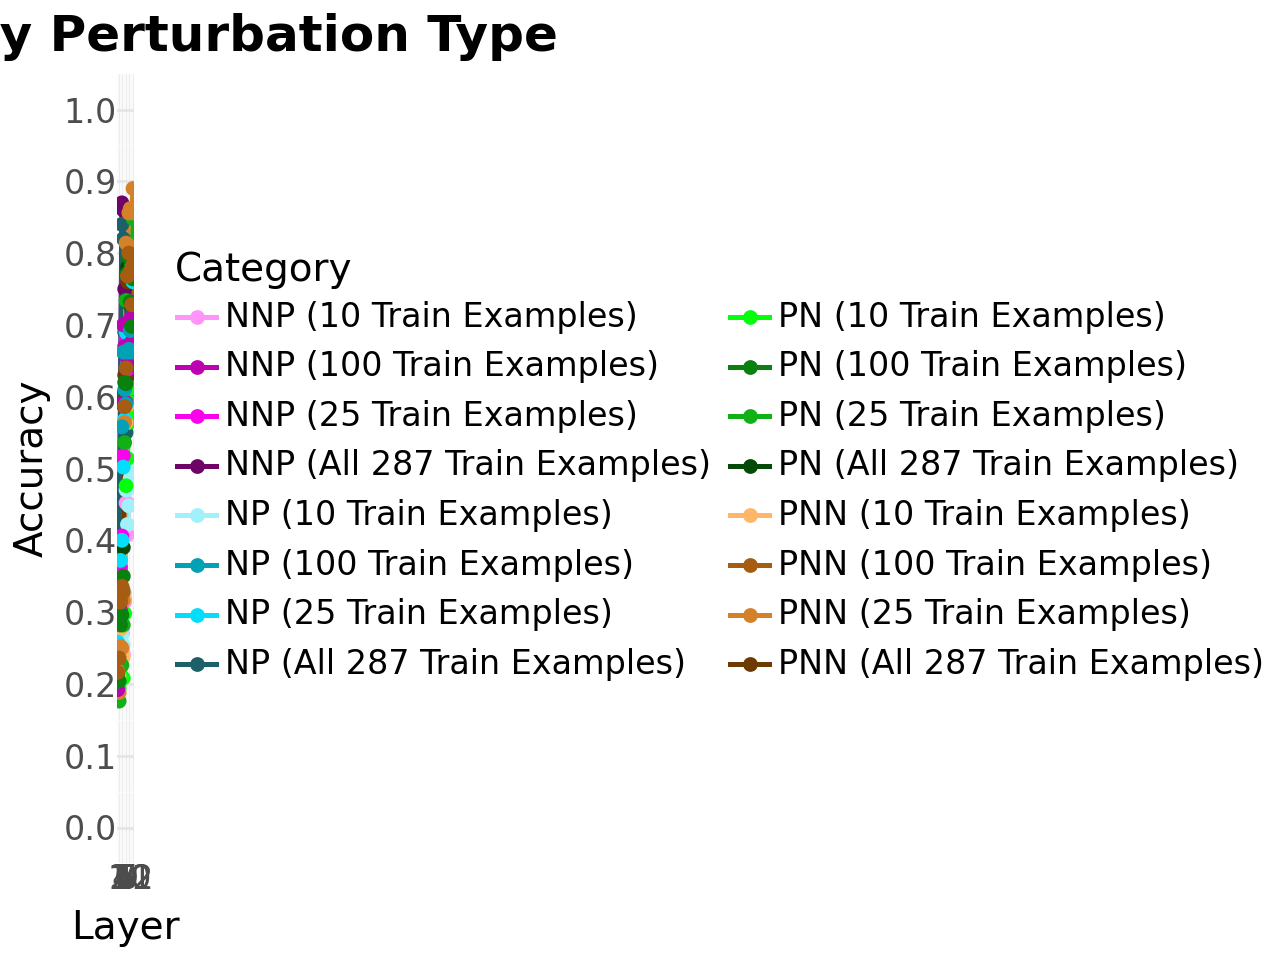

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 12 x 6 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: line_chart_pert7.pdf


<Figure size 1000x200 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (
    theme, element_text, ggplot, aes, geom_line, geom_point, theme_minimal, labs,
    scale_color_manual, scale_x_continuous, scale_y_continuous
)

# Sample data: 9 categories with values over time
data = {
    'Layer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 16,
    'Accuracy': all_pert_values,  # Ensure all_pert_values contains valid numeric data
    'Category': ['NNP (All 287 Train Examples)']*12 + ['NP (All 287 Train Examples)']*12 +
                ['PN (All 287 Train Examples)']*12 + ['PNN (All 287 Train Examples)']*12 +
                ['NNP (10 Train Examples)']*12 + ['NP (10 Train Examples)']*12 +
                ['PN (10 Train Examples)']*12 + ['PNN (10 Train Examples)']*12 +
                ['NNP (25 Train Examples)']*12 + ['NP (25 Train Examples)']*12 +
                ['PN (25 Train Examples)']*12 + ['PNN (25 Train Examples)']*12 +
                ['NNP (100 Train Examples)']*12 + ['NP (100 Train Examples)']*12 +
                ['PN (100 Train Examples)']*12 + ['PNN (100 Train Examples)']*12
}

df = pd.DataFrame(data)

# Convert Accuracy to numeric (handling errors)
df['Accuracy'] = pd.to_numeric(df['Accuracy'], errors='coerce')

# Drop rows with missing or invalid values
df = df.dropna()

# Define custom colors for each category
custom_colors = ["#ff94f9", "#bd02b2" , '#fa02ec', '#6e0368',
                 '#a2f0fa' , '#02a1b5' , '#05defa'  , '#1c6069',
                  '#03ff0b', '#0a800e',  '#12b017', '#054a07',
                  '#ffb669', '#a65d11' ,  '#d4812a', "#6e3a03"]

fig = plt.figure(figsize=(10, 2))

# Create the line graph with custom colors
plot = (ggplot(df, aes(x='Layer', y='Accuracy', color='Category', group='Category')) +
        geom_line(size=1) +
        geom_point(size=2) +
        scale_color_manual(values=custom_colors) +
        scale_x_continuous(breaks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) +
        scale_y_continuous(limits=(0, 1), breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) +  # Set y-axis scale
        labs(title="Accuracy by Perturbation Type", x="Layer", y="Accuracy", color="Category") +
        theme_minimal() +
        theme(
            plot_title=element_text(size=18, weight='bold'),
            axis_title=element_text(size=14),
            axis_text=element_text(size=12),
            legend_title=element_text(size=14),
            legend_text=element_text(size=12)
        )
       )

plot.show()
plot.save("line_chart_pert7.pdf", width=12, height=6, dpi=300)


In [ ]:
all_files

['NPN_probing/outputs/clustering_report_layer3_lt_LR_2025_10.txt',
 'NPN_probing/outputs/classification_report_layer9_base_lt_LR_subtype2_2025_10_seed_2.txt',
 'NPN_probing/outputs/classification_report_layer10_base_lt_control_LR_subtype2_2025_25_seed_8.txt',
 'NPN_probing/outputs/clustering_report_layer2_lt_LR_2025_25_seed_7.txt',
 'NPN_probing/outputs/classification_report_layer8_base_lt_LR_subtype2_2025_10_seed_6.txt',
 'NPN_probing/outputs/classification_report_layer11_base_lt_LR_subtype2_2025_25_seed_10.txt',
 'NPN_probing/outputs/classification_report_layer5_base_lt_control_LR_subtype2_2025_10_seed_3.txt',
 'NPN_probing/outputs/classification_report_layer0_base_lt_control_LR_subtype2_2025_None_seed_3.txt',
 'NPN_probing/outputs/classification_report_layer3_base_lt_control_LR_subtype2_2025_None_seed_4.txt',
 'NPN_probing/outputs/classification_report_glove_base_lt_LR2_2025_10_seed_3.txt',
 'NPN_probing/outputs/classification_report_layer5_base_lt_control_LR_subtype2_2025_10_seed_2

## binary graphs

In [ ]:
def read_report_bin(filename):
  with open(filename) as inf:
    lines = inf.readlines()

    dist_scores = lines[2].split()
    c_scores = lines[3].split()

    # print(lines)
    d_rec = dist_scores[2]
    c_rec = c_scores[2]


    #Distractor Prec, Distractor Recall, Succession Prec, Succession Rec, Juxtaposition Prec, Juxtaposition Recall
    return float(d_rec), float(c_rec)

In [ ]:
#classification_report_layer0_base_lt_LR2_2025_None_seed_4242.txt

for f in all_files:
  if re.match(f"outputs/classification_report_glove_base_lt_LR2_2025_None_seed_4242.txt", f):
    print(f)
    read_report_bin(f)

NPN_probing/outputs/classification_report_glove_base_lt_LR2_2025_None_seed_4242.txt


In [ ]:
def get_lists_binary(num, control=False, glove=False, s=1):
  if num:
    n = str(num)
  else:
    n="None"


  if not control and not glove:
    file_re = f"outputs/classification_report_layer([1-9]|1[0-2])_base_lt_LR2_2025_{n}_seed_{s}.txt"
  elif glove:
    file_re = f"outputs/classification_report_glove_base_lt_LR2_2025_{n}_seed_{s}.txt"
  else:
    file_re = f"outputs/classification_report_layer([1-9]|1[0-2])_base_lt_control_LR2_2025_{n}_seed_{s}.txt"

  d_scores = []
  c_scores = []

  f_list = []
  for f in all_files:
    if re.match(file_re, f) is not None:
      # print(f)
      f_list.append(f)

  f_list.sort()

  # print(f_list)
  if not glove:
    assert len(f_list) == 12
  else:
    assert len(f_list) == 1

  f_list_new = f_list[3:] + f_list[:3]

  for f in f_list_new:
    #print(f)
    d_score, c_score = read_report_bin(f)
    # print(scores)
    d_scores.append(d_score)

    c_scores.append(c_score)

  return d_scores, c_scores


In [ ]:
def get_average_seeds_binary(num, control=False, glove=False):
  ds = []
  cs = []
  for s in range(1, 6):
    d, c = get_lists_binary(num=num, control=control, glove=glove, s=s)
    ds.append(d)
    cs.append(c)



  d_avg = np.mean(ds, axis=0)
  c_avg = np.mean(cs, axis=0)


  return list(d_avg), list(c_avg)

In [ ]:
get_lists_binary(num=None, glove=True)

([0.71], [0.64])

In [ ]:
d_full, c_full = get_average_seeds_binary(num=None)
d_10, c_10 = get_average_seeds_binary(num=10)
d_25, c_25 = get_average_seeds_binary(num=25)
d_100, c_100 = get_average_seeds_binary(num=100)


d_control, c_control = get_average_seeds_binary(num=None, control=True)
d_glove, c_glove = get_average_seeds_binary(num=None, glove=True)
print(c_glove)

d_glove
avg_glove = list(np.mean([d_glove, c_glove], axis=0))

avg_glove = avg_glove * 12
avg_control = list(np.mean([d_control, c_control], axis=0))


[0.632]


In [ ]:
all_bin_values = c_full + c_10 + c_25 + c_100 + c_glove * 12  + c_control

In [ ]:
all_bin_values

[0.89,
 0.8699999999999999,
 0.86,
 0.9,
 0.93,
 0.9399999999999998,
 0.95,
 0.95,
 0.95,
 0.96,
 0.95,
 0.9399999999999998,
 0.776,
 0.892,
 0.8879999999999999,
 0.914,
 0.9380000000000001,
 0.96,
 0.954,
 0.966,
 0.968,
 0.968,
 0.968,
 0.9579999999999999,
 0.8160000000000001,
 0.884,
 0.884,
 0.914,
 0.924,
 0.9359999999999999,
 0.9339999999999999,
 0.952,
 0.954,
 0.954,
 0.9579999999999999,
 0.9480000000000001,
 0.86,
 0.8800000000000001,
 0.8779999999999999,
 0.906,
 0.9260000000000002,
 0.942,
 0.9480000000000001,
 0.952,
 0.958,
 0.958,
 0.958,
 0.95,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.29,
 0.35,
 0.42000000000000004,
 0.4699999999999999,
 0.44000000000000006,
 0.4,
 0.39,
 0.43,
 0.41,
 0.39,
 0.38,
 0.38]

72 72 72


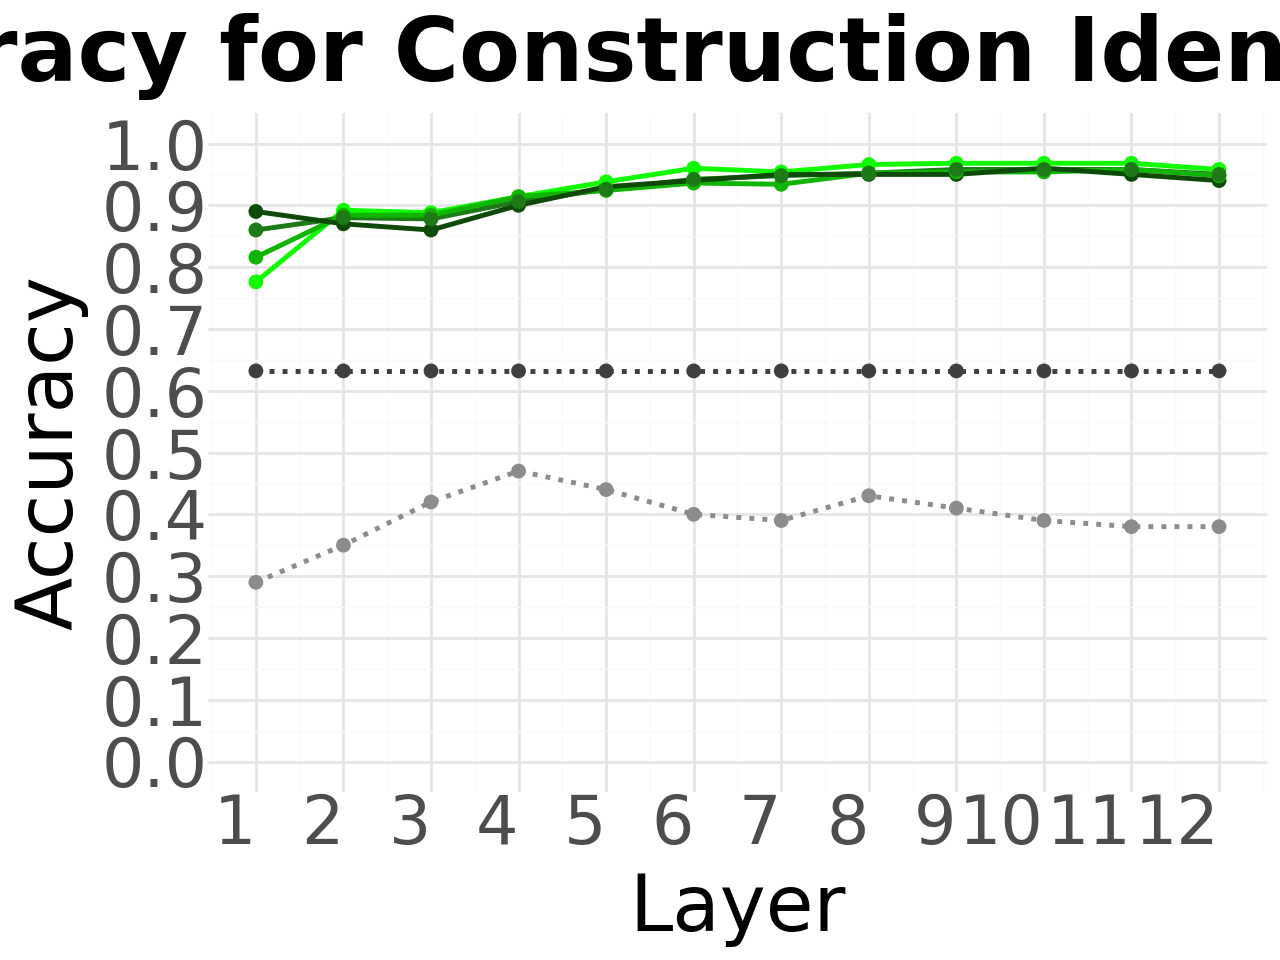

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 12 x 6 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: line_chart_bin12.pdf


<Figure size 100x200 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (
    theme, element_text, ggplot, aes, geom_line, geom_point, theme_minimal, theme_bw, labs,
    scale_color_manual, scale_x_continuous, scale_y_continuous
)

# Sample data: 9 categories with values over time
data = {
    'Layer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 6,
    'Recall': all_bin_values,  # Ensure all_bin_values contains valid data
    'Category': ['Cxns (All 287 Train Examples)']*12
    + ['Cxns (10 Train Examples)']*12 + ['Cxns (25 Train Examples)']*12 + ['Cxns (100 Train Examples)']*12
    + ['GloVe (All 287 Train Examples)']*12 + ['Control (All 287 Train Examples)']*12
}

print(len(data["Layer"]),len(data["Recall"]), len(data["Category"]))

df = pd.DataFrame(data)

# Define custom colors for each category
custom_colors = ['#8c8c8c', "#11fc00", '#1d7a16', '#10b504',
                 '#0d4a08', '#403f3f', '#6e2525',
                 '#f70202', '#1a1919']


linetype_mapping = {
    'Control (All 287 Train Examples)': 'dotted',
    'GloVe (All 287 Train Examples)': 'dotted',
    'Cxns (10 Train Examples)': 'solid',
    'Cxns (25 Train Examples)': 'solid',
    'Cxns (100 Train Examples)': 'solid',
    'Cxns (All 287 Train Examples)': 'solid',
}



fig = plt.figure(figsize=(1, 2))

# Create the line graph with custom colors
plot = (ggplot(df, aes(x='Layer', y='Recall', color='Category', linetype="Category", group='Category')) +
        geom_line(size=1) +
        geom_point(size=2) +
        scale_color_manual(values=custom_colors) +
        scale_linetype_manual(values=linetype_mapping) +  # Apply solid/dotted line types
        scale_x_continuous(breaks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) +
        scale_y_continuous(limits=(0, 1), breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) +  # Set y-axis scale
        labs(title="Accuracy for Construction Identification", x="Layer", y="Accuracy", color="Category", linetype="Category") +
        theme_minimal() +
        theme(
            plot_title=element_text(size=32, weight='bold', ha="center"),
            axis_title=element_text(size=28),
            axis_text_x=element_text(size=24, angle=0, ha="right"),  # Increase X-axis text size and rotate
            axis_text_y=element_text(size=24),
            axis_text=element_text(size=24),
            legend_position="none"
        )
       )



plot.show()
plot.save("line_chart_bin12.pdf", width=12, height=6, dpi=300)
